<a href="https://colab.research.google.com/github/Tauheed738/AcousticSenseAI/blob/main/droneSoundClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/saraalemadi/DroneAudioDataset.git

Cloning into 'DroneAudioDataset'...
remote: Enumerating objects: 10649, done.
remote: Counting objects: 100% (6/6), done.
remote: Total 10649 (delta 5), reused 5 (delta 5), pack-reused 10643
Receiving objects: 100% (10649/10649), 274.31 MiB | 26.91 MiB/s, done.
Resolving deltas: 100% (181/181), done.
Checking out files: 100% (23409/23409), done.


In [ ]:
### Let's read a sample audio using librosa
import librosa
import IPython.display as ipd
audio_file_path='/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/B_S2_D1_067-bebop_000_.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.01628039 -0.01099106 -0.01762283 ...  0.00874245 -0.01990765
  0.        ]


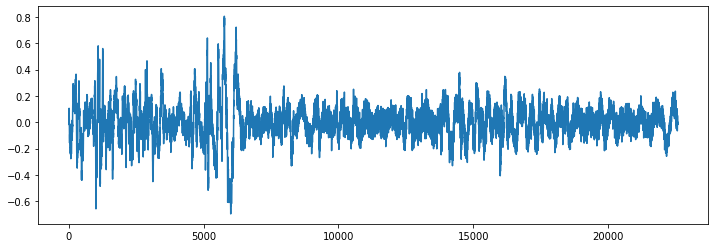

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([ 722, -823,  523, ..., 1245,  957, -666], dtype=int16)

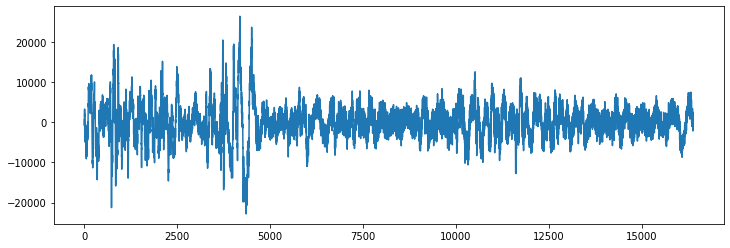

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Main Model

In [ ]:
import pandas as pd
import os
import librosa

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]

for i in os.listdir("/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/"):
    data=features_extractor(f"/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/{i}")
    extracted_features.append([data,"yes_drone"])

for i in os.listdir("/content/DroneAudioDataset/Binary_Drone_Audio/unknown/"):
    data=features_extractor(f"/content/DroneAudioDataset/Binary_Drone_Audio/unknown/{i}")
    extracted_features.append([data,"unknown"])

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-200.93982, 91.21538, -65.72957, 92.25314, -2...",yes_drone
1,"[-142.86632, 80.5195, -92.65834, 86.77328, -41...",yes_drone
2,"[-117.20935, 136.51474, -52.942253, 91.5248, -...",yes_drone
3,"[-132.50618, 135.8213, -50.268776, 83.453865, ...",yes_drone
4,"[-326.56647, 81.683846, -61.61373, 81.95469, -...",yes_drone


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist)

In [ ]:
y

array(<bound method IndexOpsMixin.tolist of 0        yes_drone
1        yes_drone
2        yes_drone
3        yes_drone
4        yes_drone
           ...    
11699      unknown
11700      unknown
11701      unknown
11702      unknown
11703      unknown
Name: class, Length: 11704, dtype: object>, dtype=object)

In [ ]:
X

array([[-2.00939819e+02,  9.12153778e+01, -6.57295685e+01, ...,
         5.14828682e+00, -3.66134858e+00, -6.83747292e-01],
       [-1.42866318e+02,  8.05195007e+01, -9.26583405e+01, ...,
         1.78497207e+00, -3.43729615e+00, -1.45552182e+00],
       [-1.17209351e+02,  1.36514740e+02, -5.29422531e+01, ...,
         7.10845292e-01, -9.87214684e-01,  1.68890715e+00],
       ...,
       [-2.32373734e+02,  1.42924545e+02, -6.41265564e+01, ...,
         1.27057719e+00, -5.55931330e-01,  1.40134203e+00],
       [-5.04917938e+02,  1.50908234e+02, -6.56353149e+01, ...,
        -1.82391226e+00, -3.01816058e+00,  9.28892046e-02],
       [-5.29292297e+02,  1.36101807e+02, -4.11597099e+01, ...,
         1.67050838e+00, -5.26543081e-01, -1.19071595e-01]], dtype=float32)

In [ ]:
X.shape

(11704, 40)

In [ ]:
y.shape

()

In [ ]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=3ad5a12a898191e3396e878309e45bc7ed280d144142065e1ed4d936d107f584
  Stored in directory: /root/.cache/pip/wheels/2f/e9/19/d3d310a06735013bf467216222ebb92b1158c5d3ae006bf92a
Successfully built keras-utils


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]
num_labels

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='BinaryCrossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
def predict(filename):

    audio_file_path=filename
    librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
    plt.figure(figsize=(12, 4))
    plt.plot(librosa_audio_data)

    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    #print(mfccs_scaled_features)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    #print(mfccs_scaled_features)
    #print(mfccs_scaled_features.shape)
    predicted_label=model.predict(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(predicted_label)

    print(prediction_class[1])

In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd

# Test with Sound

## sound 1

In [ ]:
filename="/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/B_S2_D1_067-bebop_000_.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)

## sound 2

In [ ]:
filename="/content/DroneAudioDataset/Binary_Drone_Audio/unknown/1-100032-A-01.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)

## sound 3

In [ ]:
filename="Binary_Drone_Audio/1-137-A-321.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)

## sound 4

In [ ]:
filename="Binary_Drone_Audio/1-137-A-322.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)

## sound 5

In [ ]:
filename="Binary_Drone_Audio/B_S2_D1_067-bebop_000_.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)

## sound 7

In [ ]:
filename="Binary_Drone_Audio/B_S2_D1_067-bebop_001_.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)

## sound 8

In [ ]:
filename="Binary_Drone_Audio/B_S2_D1_067-bebop_002_.wav"
ipd.Audio(filename)

In [ ]:
predict(filename)